# CVIA Image Detection on SPARK dataset

`dataset.labels.iloc[1]`

Output:
```
class                            Terra
id                                6536
image              image_06536_img.png
depth            image_06536_depth.png
bbox              [476, 469, 542, 497]
illumination                  0.244364
rotation        [0.5, -0.6, -0.4, 0.5]
translation        [-3.0, -2.3, 147.9]
Name: 1, dtype: object
```

## Keras model

Source: https://keras.io/examples/vision/retinanet/

Tensorflow version: '2.3.0'

In [1]:
# from google.colab import drive
# drive.mount('/content/gdrive')
# import sys
# sys.path.append('/content/gdrive/MyDrive/cvia_project')

In [71]:
from utils import SPARKDataset , PyTorchSparkDataset
from matplotlib import pyplot as plt
from random import randint

import os
import re
import zipfile

import numpy as np
import tensorflow as tf
# from tensorflow-gpu import keras
import tensorflow.keras as keras

import pandas as pd
from skimage import io , img_as_uint
import matplotlib.patches as mpatches
from retinanet_keras_example import *
import tensorflow_datasets as tfds
# Install tfds with: conda install -c anaconda tensorflow-datasets

In [3]:
print(f"numpy version: {np.__version__}")
print(f"tensorflow version: {tf.__version__}")

numpy version: 1.21.2
tensorflow version: 2.7.0


In [4]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [5]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [45]:
a = tf.convert_to_tensor([1, 2, 3, 4])
A = tf.data.Dataset.from_tensor_slices({'data_A': [1, 2, 3, 4]})
B = tf.data.Dataset.from_tensor_slices({'data_B': [6, 7, 8, 9]})
C = tf.data.Dataset.from_tensor_slices([9, 7, 5, 3])

In [41]:
b = tf.concat([a, (6, 7, 8, 9)], 0)

In [76]:
import sys
sys.path.append('D:\Downloads\spark_dataset')
my_test_set = tfds.load('spark_dataset', download=False)

DatasetNotFoundError: Dataset spark_dataset not found.
Available datasets:
	- abstract_reasoning
	- accentdb
	- aeslc
	- aflw2k3d
	- ag_news_subset
	- ai2_arc
	- ai2_arc_with_ir
	- amazon_us_reviews
	- anli
	- arc
	- bair_robot_pushing_small
	- bccd
	- beans
	- big_patent
	- bigearthnet
	- billsum
	- binarized_mnist
	- binary_alpha_digits
	- blimp
	- bool_q
	- c4
	- caltech101
	- caltech_birds2010
	- caltech_birds2011
	- cars196
	- cassava
	- cats_vs_dogs
	- celeb_a
	- celeb_a_hq
	- cfq
	- cherry_blossoms
	- chexpert
	- cifar10
	- cifar100
	- cifar10_1
	- cifar10_corrupted
	- citrus_leaves
	- cityscapes
	- civil_comments
	- clevr
	- clic
	- clinc_oos
	- cmaterdb
	- cnn_dailymail
	- coco
	- coco_captions
	- coil100
	- colorectal_histology
	- colorectal_histology_large
	- common_voice
	- coqa
	- cos_e
	- cosmos_qa
	- covid19
	- covid19sum
	- crema_d
	- curated_breast_imaging_ddsm
	- cycle_gan
	- d4rl_adroit_door
	- d4rl_adroit_hammer
	- d4rl_adroit_pen
	- d4rl_adroit_relocate
	- d4rl_mujoco_ant
	- d4rl_mujoco_halfcheetah
	- d4rl_mujoco_hopper
	- d4rl_mujoco_walker2d
	- dart
	- davis
	- deep_weeds
	- definite_pronoun_resolution
	- dementiabank
	- diabetic_retinopathy_detection
	- div2k
	- dmlab
	- doc_nli
	- dolphin_number_word
	- downsampled_imagenet
	- drop
	- dsprites
	- dtd
	- duke_ultrasound
	- e2e_cleaned
	- efron_morris75
	- emnist
	- eraser_multi_rc
	- esnli
	- eurosat
	- fashion_mnist
	- flic
	- flores
	- food101
	- forest_fires
	- fuss
	- gap
	- geirhos_conflict_stimuli
	- gem
	- genomics_ood
	- german_credit_numeric
	- gigaword
	- glue
	- goemotions
	- gpt3
	- gref
	- groove
	- gtzan
	- gtzan_music_speech
	- hellaswag
	- higgs
	- horses_or_humans
	- howell
	- i_naturalist2017
	- imagenet2012
	- imagenet2012_corrupted
	- imagenet2012_multilabel
	- imagenet2012_real
	- imagenet2012_subset
	- imagenet_a
	- imagenet_r
	- imagenet_resized
	- imagenet_v2
	- imagenette
	- imagewang
	- imdb_reviews
	- irc_disentanglement
	- iris
	- kddcup99
	- kitti
	- kmnist
	- lambada
	- lfw
	- librispeech
	- librispeech_lm
	- libritts
	- ljspeech
	- lm1b
	- lost_and_found
	- lsun
	- lvis
	- malaria
	- math_dataset
	- mctaco
	- mlqa
	- mnist
	- mnist_corrupted
	- movie_lens
	- movie_rationales
	- movielens
	- moving_mnist
	- multi_news
	- multi_nli
	- multi_nli_mismatch
	- natural_questions
	- natural_questions_open
	- newsroom
	- nsynth
	- nyu_depth_v2
	- ogbg_molpcba
	- omniglot
	- open_images_challenge2019_detection
	- open_images_v4
	- openbookqa
	- opinion_abstracts
	- opinosis
	- opus
	- oxford_flowers102
	- oxford_iiit_pet
	- para_crawl
	- patch_camelyon
	- paws_wiki
	- paws_x_wiki
	- pet_finder
	- pg19
	- piqa
	- places365_small
	- plant_leaves
	- plant_village
	- plantae_k
	- protein_net
	- qa4mre
	- qasc
	- quac
	- quickdraw_bitmap
	- race
	- radon
	- reddit
	- reddit_disentanglement
	- reddit_tifu
	- ref_coco
	- resisc45
	- rlu_atari
	- rlu_dmlab_explore_object_rewards_few
	- rlu_dmlab_explore_object_rewards_many
	- rlu_dmlab_rooms_select_nonmatching_object
	- rlu_dmlab_rooms_watermaze
	- rlu_dmlab_seekavoid_arena01
	- robonet
	- rock_paper_scissors
	- rock_you
	- s3o4d
	- salient_span_wikipedia
	- samsum
	- savee
	- scan
	- scene_parse150
	- schema_guided_dialogue
	- scicite
	- scientific_papers
	- sentiment140
	- shapes3d
	- siscore
	- smallnorb
	- snli
	- so2sat
	- speech_commands
	- spoken_digit
	- squad
	- stanford_dogs
	- stanford_online_products
	- star_cfq
	- starcraft_video
	- stl10
	- story_cloze
	- summscreen
	- sun397
	- super_glue
	- svhn_cropped
	- symmetric_solids
	- tao
	- ted_hrlr_translate
	- ted_multi_translate
	- tedlium
	- tf_flowers
	- the300w_lp
	- tiny_shakespeare
	- titanic
	- trec
	- trivia_qa
	- tydi_qa
	- uc_merced
	- ucf101
	- vctk
	- visual_domain_decathlon
	- voc
	- voxceleb
	- voxforge
	- waymo_open_dataset
	- web_nlg
	- web_questions
	- wider_face
	- wiki40b
	- wiki_bio
	- wiki_table_questions
	- wiki_table_text
	- wikiann
	- wikihow
	- wikipedia
	- wikipedia_toxicity_subtypes
	- wine_quality
	- winogrande
	- wmt13_translate
	- wmt14_translate
	- wmt15_translate
	- wmt16_translate
	- wmt17_translate
	- wmt18_translate
	- wmt19_translate
	- wmt_t2t_translate
	- wmt_translate
	- wordnet
	- wsc273
	- xnli
	- xquad
	- xsum
	- xtreme_pawsx
	- xtreme_xnli
	- yelp_polarity_reviews
	- yes_no
	- youtube_vis

Check that:
    - if dataset was added recently, it may only be available
      in `tfds-nightly`
    - the dataset name is spelled correctly
    - dataset class defines all base class abstract methods
    - the module defining the dataset class is imported

Did you mean: spark_dataset -> math_dataset


In [46]:
ds = tf.data.Dataset.zip((A, B, C))

In [47]:
ds

<ZipDataset shapes: ({data_A: ()}, {data_B: ()}, ()), types: ({data_A: tf.int32}, {data_B: tf.int32}, tf.int32)>

In [11]:
my_images = keras.utils.image_dataset_from_directory('D:/Downloads/semester_project/project_files/train_small/rgb/')

Found 30000 files belonging to 11 classes.


In [12]:
my_images

<BatchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

In [13]:
for element in my_images.take(1):
    print(element[0])
    #plt.imshow(keras.utils.array_to_img(element[1:3]))

tf.Tensor(
[[[[2.500e-01 2.500e-01 2.500e-01]
   [5.000e-01 5.000e-01 5.000e-01]
   [5.000e-01 5.000e-01 5.000e-01]
   ...
   [0.000e+00 0.000e+00 0.000e+00]
   [5.000e-01 5.000e-01 5.000e-01]
   [2.500e-01 2.500e-01 2.500e-01]]

  [[7.500e-01 7.500e-01 7.500e-01]
   [1.250e+00 1.250e+00 1.250e+00]
   [5.000e-01 5.000e-01 5.000e-01]
   ...
   [2.500e-01 2.500e-01 2.500e-01]
   [2.500e-01 2.500e-01 2.500e-01]
   [7.500e-01 7.500e-01 7.500e-01]]

  [[2.500e-01 2.500e-01 2.500e-01]
   [2.500e-01 2.500e-01 2.500e-01]
   [0.000e+00 0.000e+00 0.000e+00]
   ...
   [7.500e-01 7.500e-01 7.500e-01]
   [7.500e-01 7.500e-01 7.500e-01]
   [5.000e-01 5.000e-01 5.000e-01]]

  ...

  [[1.000e+00 1.000e+00 1.000e+00]
   [1.000e+00 1.000e+00 1.000e+00]
   [2.500e-01 0.000e+00 0.000e+00]
   ...
   [7.500e-01 7.500e-01 7.500e-01]
   [2.500e-01 2.500e-01 2.500e-01]
   [7.500e-01 7.500e-01 7.500e-01]]

  [[2.500e-01 2.500e-01 2.500e-01]
   [7.500e-01 7.500e-01 7.500e-01]
   [3.250e+00 1.500e+00 1.000e+00]
 

### Load dataset with utils.py

In [48]:
# set up the path to a local copy of the SPARK dataset, labels csv files should be in the same directory.

dataset_root_dir='/content/gdrive/MyDrive/cvia_project/train_small'
dataset_root_dir = 'D:/Downloads/semester_project/project_files/train_small/'

split = 'rgb'
test_length = 30000
dataset = SPARKDataset(root_dir=dataset_root_dir,split=split)


# class,id,image,depth,bbox,illumination,rotation,translation
labels_class = []
labels_id = []
labels_image = []
labels_depth = []
labels_bbox_xmin = []
labels_bbox_ymin = []
labels_bbox_xmax = []
labels_bbox_ymax = []

labels_bbox_x = []
labels_bbox_y = []
labels_bbox_width = []
labels_bbox_height = []

labels_bbox = []

labels_illumination = []


for i in range(test_length):
    labels_class.append(dataset.labels.iloc[i]['class'])
    labels_id.append(dataset.labels.iloc[i]['id'])
    labels_image.append(dataset.labels.iloc[i]['image'])
    labels_depth.append(dataset.labels.iloc[i]['depth'])
    labels_illumination.append(dataset.labels.iloc[i]['illumination'])
    
    labels_bbox_xmin.append(dataset.get_bbox(i)[0])
    labels_bbox_ymin.append(dataset.get_bbox(i)[1])
    labels_bbox_xmax.append(dataset.get_bbox(i)[2])
    labels_bbox_ymax.append(dataset.get_bbox(i)[3])
    
    labels_bbox.append([[dataset.get_bbox(i)[0], 
                        dataset.get_bbox(i)[1], 
                        dataset.get_bbox(i)[2], 
                        dataset.get_bbox(i)[3]],])
    
data = {'class': labels_class,
        'id': labels_id,
        'image': labels_image,
        'depth': labels_depth,
        'illumination': labels_illumination,
       }

bbox_data = {'xmin': labels_bbox_xmin,
             'ymin': labels_bbox_ymin,
             'xmax': labels_bbox_xmax,
             'ymax': labels_bbox_ymax,
            }
bbox_data = labels_bbox

label_dataframe = pd.DataFrame(data)
bbox_dataframe = pd.DataFrame(bbox_data)

In [49]:
print(f'len(label_dataframe): {len(label_dataframe)}')
print(os.path.join(dataset.root_dir, f"{label_dataframe['class'][i]}/{label_dataframe['image'][i]}"))
print()
label_dataframe.head()

len(label_dataframe): 30000
D:/Downloads/semester_project/project_files/train_small/rgb\Aquarius/image_04615_img.png



,class,id,image,depth,illumination
0,Cloudsat,10563,image_10563_img.png,image_10563_depth.png,81.036141
1,Terra,6536,image_06536_img.png,image_06536_depth.png,0.244364
2,Sentinel-6,4676,image_04676_img.png,image_04676_depth.png,0.126758
3,Sentinel-6,2965,image_02965_img.png,image_02965_depth.png,0.686202
4,CubeSat,3907,image_03907_img.png,image_03907_depth.png,0.480803


In [16]:
# label_dataframe.sort_values(by=['class'])

### Dataframe slicing

In [17]:
def visualize(i, label_dataframe, bbox_dataframe, root_dir, size=(15,15),  ax=None, image_type='rgb'):

        """ Visualizing image, with ground truth pose with axes projected to training image. """

        if ax is None:
            ax = plt.gca()
            
        image_path = os.path.join(root_dir, f"rgb/{label_dataframe['class'][i]}/{label_dataframe['image'][i]}")
        depth_path = os.path.join(root_dir, f"depth/{label_dataframe['class'][i]}/{label_dataframe['depth'][i]}")
        
        min_x = bbox_dataframe[0][i][0]
        min_y = bbox_dataframe[0][i][1]
        max_x = bbox_dataframe[0][i][2]
        max_y = bbox_dataframe[0][i][3]
        
        image = io.imread(image_path)
        depth = io.imread(depth_path)

        if image_type=='rgb':
            ax.imshow(image,vmin=0, vmax=255)
            my_color = 'red'
            im_scale = 1
        elif image_type=='depth':
            ax.imshow(depth, vmin=0, vmax=255)
            my_color = 'red'
            im_scale = 0.25
        else:
            print('Incorrect parameter: image_type. Exiting function!')
            return
        

        rect = mpatches.Rectangle((im_scale*min_y, im_scale*min_x), im_scale*(max_y - min_y), im_scale*(max_x - min_x),
                                    fill=False, edgecolor=my_color, linewidth=2)

        ax.add_patch(rect)
        
        #label = f"{list(self.class_map.keys())[list(self.class_map.values()).index(img_class)]}"
        
        #ax.text(min_y, min_x-20, label,color='white',fontsize=15)
        ax.set_axis_off()

        return 
# root_dir='/content/gdrive/MyDrive/cvia_project/train_small'
root_dir = 'D:/Downloads/semester_project/project_files/train_small/'

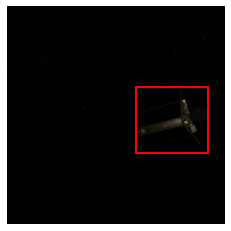

In [50]:
# root_dir = '/run/media/dave/Volume/cvia_dataset/train_small/'
root_dir = 'D:/Downloads/semester_project/project_files/train_small/'
# root_dir='/content/gdrive/MyDrive/cvia_project/train_small'
visualize(3, 
          label_dataframe,
          bbox_dataframe,
          root_dir,
          ax=None,
          size=(15,15),
          image_type='rgb')

## Create model conform dataset

Dataset should be compliant to the following form:

```python
{'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), 
 'image/filename': TensorSpec(shape=(), dtype=tf.string, name=None), 
 'image/id': TensorSpec(shape=(), dtype=tf.int64, name=None), 
 'objects': 
     {'area': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 
      'bbox': TensorSpec(shape=(None, 4), dtype=tf.float32, name=None), 
      'id': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 
      'is_crowd': TensorSpec(shape=(None,), dtype=tf.bool, name=None), 
      'label': TensorSpec(shape=(None,), dtype=tf.int64, name=None)
     }
}
```

In [19]:
label_dataframe.head()

,class,id,image,depth,illumination
0,Cloudsat,10563,image_10563_img.png,image_10563_depth.png,81.036141
1,Terra,6536,image_06536_img.png,image_06536_depth.png,0.244364
2,Sentinel-6,4676,image_04676_img.png,image_04676_depth.png,0.126758
3,Sentinel-6,2965,image_02965_img.png,image_02965_depth.png,0.686202
4,CubeSat,3907,image_03907_img.png,image_03907_depth.png,0.480803


In [20]:
bbox_dataframe.head()

,0
0,"[262, 283, 323, 367]"
1,"[476, 469, 542, 497]"
2,"[520, 445, 584, 516]"
3,"[377, 606, 692, 945]"
4,"[523, 421, 560, 464]"


#### Generate a dataframe slice with the images

In [59]:
def generate_images_frame(label_dataframe, root_dir):
    images = []
    image_names = []
    for i in range(len(label_dataframe['image'])):
            image_path = os.path.join(root_dir, f"rgb/{label_dataframe['class'][i]}/{label_dataframe['image'][i]}")
#             images.append(io.imread(image_path))
            image_names.append(image_path)#("{label_dataframe['class'][i]}/{label_dataframe['image'][i]}")
    return images, image_names

dataset_images, image_names = generate_images_frame(label_dataframe, root_dir)

def get_areas(bbox_dataframe):
    areas = []
    for i in range(len(bbox_dataframe)):
    # areas = (bbox_dataframe['xmax'] - bbox_dataframe['xmin']) * (bbox_dataframe['ymax'] - bbox_dataframe['ymin'])
        areas.append(np.array(bbox_dataframe[0][i][2] - bbox_dataframe[0][i][0]) * (bbox_dataframe[0][i][3] - bbox_dataframe[0][i][1]))
    return areas

def convert_ids(id_frame):
    converted_ids = []
    for element in id_frame:
      converted_ids.append(np.array([element]))
    return np.array(converted_ids)

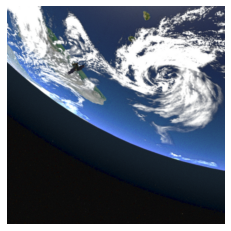

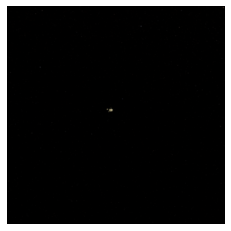

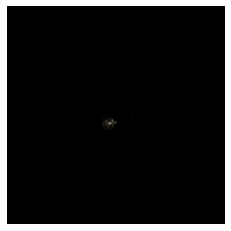

In [22]:
# dataset_images
for i in range(3):
  plt.figure()
  plt.axis("off")
  plt.imshow(dataset_images[i])
  plt.show()

#### Generate the tensorflow dataframe with the respective fields

In [78]:
dataset_areas = []
areas = get_areas(bbox_dataframe)
is_crowds = []
for i in range(len(label_dataframe)):
    is_crowds.append(np.array(False))
#np.zeros(len(label_dataframe))

class_map =  {'AcrimSat':0, 'Aquarius':1, 'Aura':2, 'Calipso':3, 'Cloudsat':4, 'CubeSat':5,
                           'Debris' :6, 'Jason':7, 'Sentinel-6':8, 'Terra':9, 'TRMM':10}
remapped_labels = []
for i in range(len(label_dataframe)):
    remapped_labels.append(class_map[label_dataframe['class'][i]])
remapped_labels = np.int64(remapped_labels)

# Cast bbox to float
labels_bbox = np.array(labels_bbox)
labels_bbox = labels_bbox.astype(float)
labels_bbox = np.float32(labels_bbox)
labels_bbox = labels_bbox/1024 # may be wrong
# labels_bbox = np.linalg.norm(labels_bbox)

## Remap to have an array of lists so that the variables can be read correctly with the indices
converted_ids = convert_ids(label_dataframe['id'])
remapped_labels = convert_ids(remapped_labels)
is_crowds = convert_ids(is_crowds)

dataset_objects = {'area': areas,
                   'bbox': labels_bbox,
                   'id': converted_ids,
                   'is_crowd': is_crowds,
                   'label': remapped_labels,
                  }
# tf_input_data = {#'image': dataset_images, 
#                  'image/filename': image_names, #label_dataframe['image'], 
#                  'image/id': label_dataframe['id'],
#                  'objects': dataset_objects
#                  }
tf_input_data = {'image': image_names, 
                 'image/filename': label_dataframe['image'], 
                 'image/id': label_dataframe['id'],
                 'objects': dataset_objects
                 }

In [79]:
import pickle
path = 'D:/Downloads/semester_project/project_files/train_small/annotations.pkl'
with open(path, 'wb') as file:
    pickle.dump(tf_input_data, file)

In [80]:
import pandas
annotation_path = 'D:/Downloads/semester_project/project_files/train_small/annotations.pkl'
df = pd.read_pickle(annotation_path)

In [82]:
df['image']

['D:/Downloads/semester_project/project_files/train_small/rgb/Cloudsat/image_10563_img.png',
 'D:/Downloads/semester_project/project_files/train_small/rgb/Terra/image_06536_img.png',
 'D:/Downloads/semester_project/project_files/train_small/rgb/Sentinel-6/image_04676_img.png',
 'D:/Downloads/semester_project/project_files/train_small/rgb/Sentinel-6/image_02965_img.png',
 'D:/Downloads/semester_project/project_files/train_small/rgb/CubeSat/image_03907_img.png',
 'D:/Downloads/semester_project/project_files/train_small/rgb/CubeSat/image_01269_img.png',
 'D:/Downloads/semester_project/project_files/train_small/rgb/AcrimSat/image_11073_img.png',
 'D:/Downloads/semester_project/project_files/train_small/rgb/Aquarius/image_02726_img.png',
 'D:/Downloads/semester_project/project_files/train_small/rgb/AcrimSat/image_09152_img.png',
 'D:/Downloads/semester_project/project_files/train_small/rgb/TRMM/image_05861_img.png',
 'D:/Downloads/semester_project/project_files/train_small/rgb/CubeSat/image

In [24]:
tf_dataset = tf.data.Dataset.from_tensor_slices(tf_input_data)

In [25]:
print(f"tf_dataset Size: {tf_dataset.cardinality().numpy()}")

tf_dataset Size: 100


In [26]:
print(tf_dataset)

<TensorSliceDataset shapes: {image: (1024, 1024, 3), image/filename: (), image/id: (), objects: {area: (), bbox: (1, 4), id: (1,), is_crowd: (1,), label: (1,)}}, types: {image: tf.uint8, image/filename: tf.string, image/id: tf.int64, objects: {area: tf.int32, bbox: tf.float32, id: tf.int32, is_crowd: tf.bool, label: tf.int64}}>


In [27]:
for element in tf_dataset.take(1).as_numpy_iterator():
    print(element["objects"])

{'area': 5124, 'bbox': array([[0.25585938, 0.2763672 , 0.3154297 , 0.35839844]], dtype=float32), 'id': array([10563]), 'is_crowd': array([False]), 'label': array([4], dtype=int64)}


## Generate the Keras Model

Setting up training parameters:

In [28]:
# model_dir='/content/gdrive/MyDrive/cvia_project/model'
model_dir = 'D:/Downloads/semester_project/project_files/model/'

label_encoder = LabelEncoder()

num_classes = 11
batch_size = 1

learning_rates = [2.5e-06, 0.000625, 0.00125, 0.0025, 0.00025, 2.5e-05]
learning_rate_boundaries = [125, 250, 500, 240000, 360000]
learning_rate_fn = tf.optimizers.schedules.PiecewiseConstantDecay(
    boundaries=learning_rate_boundaries, values=learning_rates
)

Initializing and compiling model:

In [29]:
def get_backbone():
 """Builds ResNet50 with pre-trained imagenet weights"""
 backbone = keras.applications.ResNet50(
     include_top=False, input_shape=[None, None, 3]
 )
 c3_output, c4_output, c5_output = [
     backbone.get_layer(layer_name).output
     for layer_name in ["conv3_block4_out", "conv4_block6_out", "conv5_block3_out"]
 ]
 return keras.Model(
     inputs=[backbone.inputs], outputs=[c3_output, c4_output, c5_output]
 ) 

In [30]:
resnet50_backbone = get_backbone()
loss_fn = RetinaNetLoss(num_classes)
model = RetinaNet(num_classes, resnet50_backbone)

optimizer = tf.optimizers.SGD(learning_rate=learning_rate_fn, momentum=0.9)
model.compile(loss=loss_fn, optimizer=optimizer)

In [31]:
print(resnet50_backbone)

In [32]:
model.build((None, 512, 512, 3))

In [33]:
model.summary()

Model: "RetinaNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 FeaturePyramid (FeaturePyra  multiple                 31585152  
 mid)                                                            
                                                                 
 sequential (Sequential)     (None, None, None, 99)    2588515   
                                                                 
 sequential_1 (Sequential)   (None, None, None, 36)    2443300   
                                                                 
Total params: 36,616,967
Trainable params: 36,563,847
Non-trainable params: 53,120
_________________________________________________________________


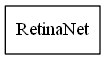

In [34]:
keras.utils.plot_model(model, show_shapes=True)

Setting up callbacks:

In [30]:
callbacks_list = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath=os.path.join(model_dir, "weights" + "_epoch_{epoch}"),
        monitor="loss",
        save_best_only=False,
        save_weights_only=True,
        verbose=1,
    )
]

Load dataset as training and validation set:

In [31]:
# Credit:
# https://towardsdatascience.com/how-to-split-a-tensorflow-dataset-into-train-validation-and-test-sets-526c8dd29438
def get_dataset_partitions_tf(ds, ds_size, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    if shuffle:
        # Specify seed to always have the same split distribution between runs
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [32]:
train_dataset, val_dataset, test_dataset = get_dataset_partitions_tf(tf_dataset, tf_dataset.cardinality().numpy())

In [33]:
train_dataset_check, val_dataset_check, test_dataset_check = get_dataset_partitions_tf(tf_dataset, tf_dataset.cardinality().numpy())

In [34]:
train_dataset

<TakeDataset shapes: {image: (1024, 1024, 3), image/filename: (), image/id: (), objects: {area: (), bbox: (1, 4), id: (1,), is_crowd: (1,), label: (1,)}}, types: {image: tf.uint8, image/filename: tf.string, image/id: tf.int64, objects: {area: tf.int32, bbox: tf.float32, id: tf.int32, is_crowd: tf.bool, label: tf.int64}}>

In [35]:
print(f"Train Data Set Size: {train_dataset.cardinality().numpy()}")
print(f"Validation Data Set Size: {val_dataset.cardinality().numpy()}")
print(f"Test Data Set Size: {test_dataset.cardinality().numpy()}")

Train Data Set Size: 320
Validation Data Set Size: 40
Test Data Set Size: 40


8780
{'area': 3744, 'bbox': array([[0.4638672 , 0.4716797 , 0.51464844, 0.5419922 ]], dtype=float32), 'id': array([8780]), 'is_crowd': array([False]), 'label': array([1], dtype=int64)}
bbox: [[0.4638672  0.4716797  0.51464844 0.5419922 ]]


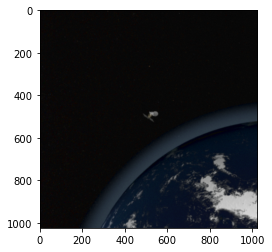

In [36]:
for element in train_dataset.take(1).as_numpy_iterator():
    print(element['image/id'])
    print(element['objects'])
    print(f"bbox: {element['objects']['bbox']}")
    plt.imshow(element['image'])

## Training of spark dataset

In [37]:

# For real training, now commented for testing
try:
    autotune = tf.data.AUTOTUNE     
except:
    autotune = tf.data.experimental.AUTOTUNE 
train_dataset = train_dataset.map(preprocess_data, num_parallel_calls=autotune)
train_dataset = train_dataset.shuffle(8 * batch_size)
train_dataset = train_dataset.padded_batch(
    batch_size=batch_size, padding_values=(0.0, 1e-8, -1), drop_remainder=True
)
train_dataset = train_dataset.map(
    label_encoder.encode_batch, num_parallel_calls=autotune
)
train_dataset = train_dataset.apply(tf.data.experimental.ignore_errors())
train_dataset = train_dataset.prefetch(autotune)

val_dataset = val_dataset.map(preprocess_data, num_parallel_calls=autotune)
val_dataset = val_dataset.padded_batch(
    batch_size=1, padding_values=(0.0, 1e-8, -1), drop_remainder=True
)
val_dataset = val_dataset.map(label_encoder.encode_batch, num_parallel_calls=autotune)
val_dataset = val_dataset.apply(tf.data.experimental.ignore_errors())
val_dataset = val_dataset.prefetch(autotune)

In [38]:
train_dataset

<PrefetchDataset shapes: ((1, None, None, 3), (None, None, 5)), types: (tf.float32, tf.float32)>

In [39]:
# Uncomment the following lines, when training on full dataset
# train_steps_per_epoch = dataset_info.splits["train"].num_examples // batch_size
# val_steps_per_epoch = \
#     dataset_info.splits["validation"].num_examples // batch_size

# train_steps = 4 * 100000
# epochs = train_steps // train_steps_per_epoch

epochs = 30

# Running 100 training and 50 validation steps,
# remove `.take` when training on the full dataset

model.fit(
    train_dataset, #.take(20),
    validation_data=val_dataset, #.take(5),
    epochs=epochs,
    callbacks=callbacks_list,
    verbose=1,
)

Epoch 1/30
    320/Unknown - 202s 510ms/step - loss: 3.8186
Epoch 00001: saving model to D:/Downloads/semester_project/project_files/model\weights_epoch_1
320/320 [==============================] - 222s 572ms/step - loss: 3.8186 - val_loss: 3.8346
Epoch 2/30
320/320 [==============================] - ETA: 0s - loss: 3.7345
Epoch 00002: saving model to D:/Downloads/semester_project/project_files/model\weights_epoch_2
320/320 [==============================] - 169s 529ms/step - loss: 3.7345 - val_loss: 3.4148
Epoch 3/30
320/320 [==============================] - ETA: 0s - loss: 3.7316
Epoch 00003: saving model to D:/Downloads/semester_project/project_files/model\weights_epoch_3
320/320 [==============================] - 167s 520ms/step - loss: 3.7316 - val_loss: 4.9102
Epoch 4/30
320/320 [==============================] - ETA: 0s - loss: 3.7828
Epoch 00004: saving model to D:/Downloads/semester_project/project_files/model\weights_epoch_4
320/320 [==============================] - 166s 51

##  LOAD AND APPLY MODEL

In [40]:
# Change this to `model_dir` when not using the downloaded weights
weights_dir='D:/Downloads/semester_project/project_files/model/'


latest_checkpoint = tf.train.latest_checkpoint(weights_dir)
model.load_weights(latest_checkpoint)

image = tf.keras.Input(shape=[None, None, 3], name="image")
predictions = model(image, training=False)
detections = DecodePredictions(confidence_threshold=0.5)(image, predictions)
inference_model = tf.keras.Model(inputs=image, outputs=detections)

bbox: []


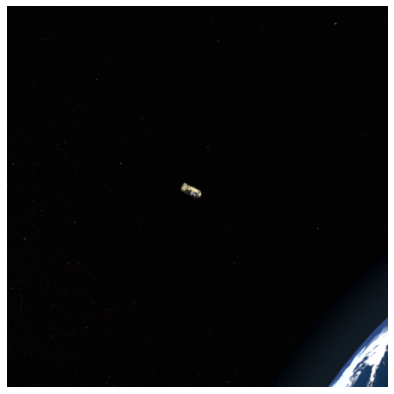

bbox: []


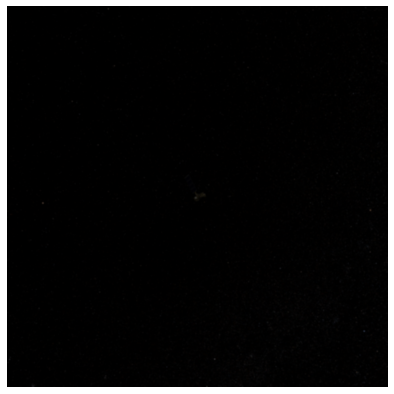

bbox: []


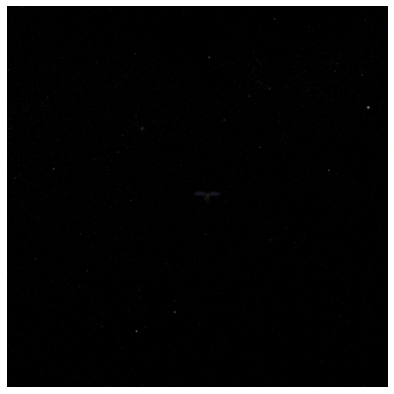

bbox: []


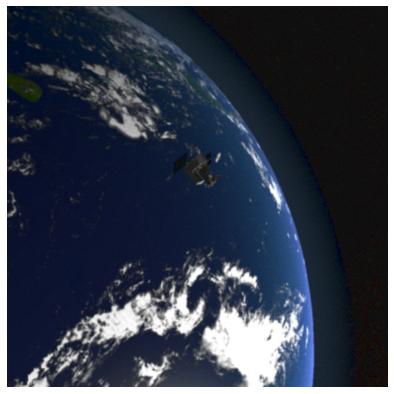

bbox: []


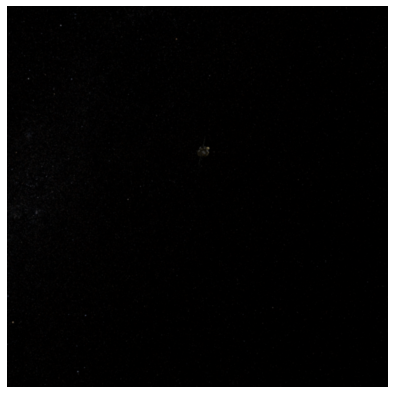

In [41]:
def prepare_image(image):
    image, _, ratio = resize_and_pad_image(image, min_side=256, max_side=256, jitter=None)
    image = tf.keras.applications.resnet.preprocess_input(image)
    return tf.expand_dims(image, axis=0), ratio


# val_dataset = tfds.load("coco/2017", split="validation", data_dir="data")
# val_dataset = test_dataset
# int2str = dataset_info.features["objects"]["label"].int2str


for sample in test_dataset.take(5):
    image = tf.cast(sample["image"], dtype=tf.float32)
    input_image, ratio = prepare_image(image)
    detections = inference_model.predict(input_image)
    num_detections = detections.valid_detections[0]
    class_names = [
        int2str(int(x)) for x in detections.nmsed_classes[0][:num_detections]
    ]
    # class_names = remapped_labels
    print(f'bbox: {detections.nmsed_boxes[0][:num_detections] / ratio}')
    visualize_detections(
        image,
        detections.nmsed_boxes[0][:num_detections] / ratio,
        class_names,
        detections.nmsed_scores[0][:num_detections],
    )

TODO:
- tune manually

In [42]:
detections.nmsed_boxes

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0.,